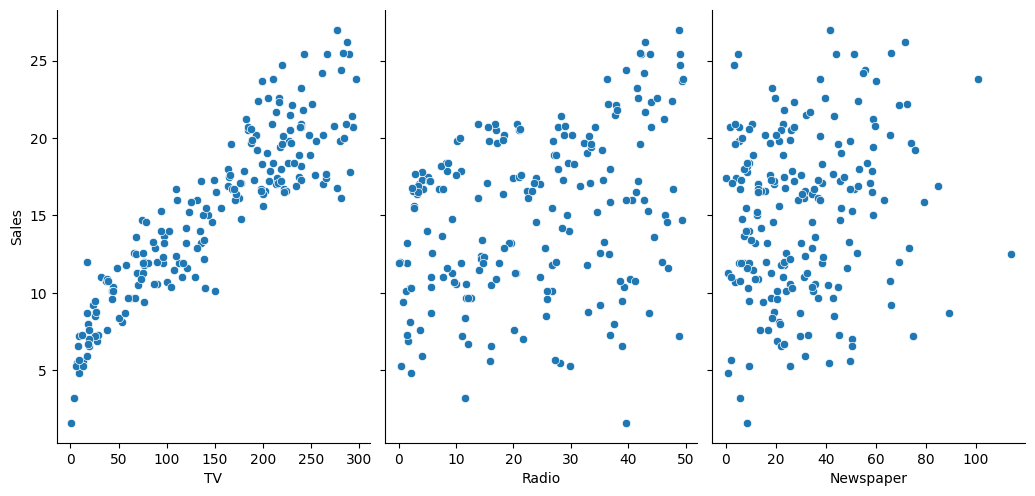

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
data = pd.read_csv(r"C:\Users\ABDUL WAKEEL\Desktop\advertising.csv")

# Data Preprocessing
# Check for null values
if data.isnull().sum().sum() > 0:
    print("Dataset contains missing values. Please handle them first.")
    exit()

# Exploratory Data Analysis
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()

In [2]:
# predictor variables and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2.9077569102710896
R² Score: 0.9059011844150826


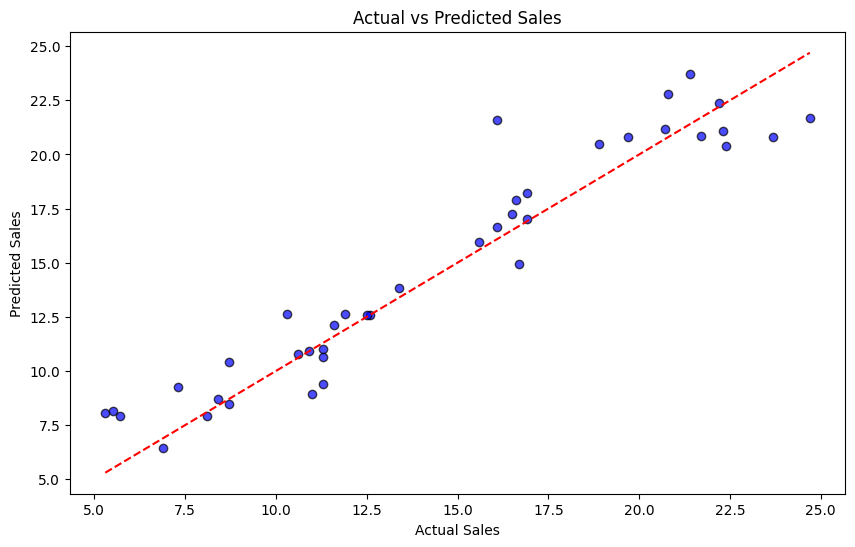

In [3]:
# Visualizing the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [ ]:
# for single prediction
def predict_sales(tv, radio, newspaper):
    """
    Predict sales given advertising budget on TV, Radio, and Newspaper.

    Parameters:
    tv (float): Advertising budget on TV.
    radio (float): Advertising budget on Radio.
    newspaper (float): Advertising budget on Newspaper.

    Returns:
    float: Predicted Sales.
    """
    input_data = np.array([[tv, radio, newspaper]])
    predicted_sales = model.predict(input_data)[0]
    return predicted_sales

#Prediction names
tv_budget = float(input("Enter TV advertising budget: "))
radio_budget = float(input("Enter Radio advertising budget: "))
newspaper_budget = float(input("Enter Newspaper advertising budget: "))

predicted_sales = predict_sales(tv_budget, radio_budget, newspaper_budget)
print(f"Predicted Sales: {predicted_sales:.2f} units")